In [25]:
import numpy as np
import pandas as pd
myData = pd.read_csv('../data/Thyroid_Diff.csv')
print(myData.shape)

(383, 17)


In [26]:
peek = myData.head(10)
print(peek)

   Age Gender Smoking Hx Smoking Hx Radiothreapy          Thyroid Function  \
0   27      F      No         No              No                 Euthyroid   
1   34      F      No        Yes              No                 Euthyroid   
2   30      F      No         No              No                 Euthyroid   
3   62      F      No         No              No                 Euthyroid   
4   62      F      No         No              No                 Euthyroid   
5   52      M     Yes         No              No                 Euthyroid   
6   41      F      No        Yes              No  Clinical Hyperthyroidism   
7   46      F      No         No              No                 Euthyroid   
8   51      F      No         No              No                 Euthyroid   
9   40      F      No         No              No                 Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk    T   N   M Stage  \
0   Single nodular goiter-left         No  

In [27]:
shape = myData.shape
print(shape)

(383, 17)


In [28]:
types = myData.dtypes
print(types)

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object


In [29]:
outcome_counts = myData.groupby('Recurred').size()
print(outcome_counts)

Recurred
No     275
Yes    108
dtype: int64


In [30]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from numpy import set_printoptions

label_encoder = LabelEncoder()

categorical_columns = ['Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function','Physical Examination','Adenopathy','Pathology','Focality','Risk','T','N','M','Stage','Response','Recurred']

for col in categorical_columns:
    myData[col] = label_encoder.fit_transform(myData[col])

In [31]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = myData.corr(method = 'pearson')
print(correlations)

                        Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
Age                   1.000   0.186    0.310       0.135            0.177             0.036   
Gender                0.186   1.000    0.622       0.176            0.236             0.038   
Smoking               0.310   0.622    1.000       0.253            0.298             0.018   
Hx Smoking            0.135   0.176    0.253       1.000            0.261             0.022   
Hx Radiothreapy       0.177   0.236    0.298       0.261            1.000            -0.113   
Thyroid Function      0.036   0.038    0.018       0.022           -0.113             1.000   
Physical Examination -0.093  -0.079   -0.067      -0.028           -0.013             0.097   
Adenopathy           -0.102  -0.216   -0.156      -0.050           -0.058            -0.044   
Pathology            -0.160  -0.024   -0.202      -0.095           -0.106             0.095   
Focality             -0.224  -0.208   -0.238      

<AxesSubplot:ylabel='Frequency'>

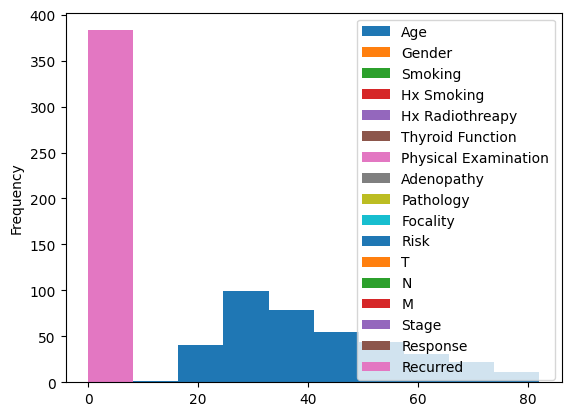

In [32]:
import matplotlib.pyplot as plt
myData.plot.hist()

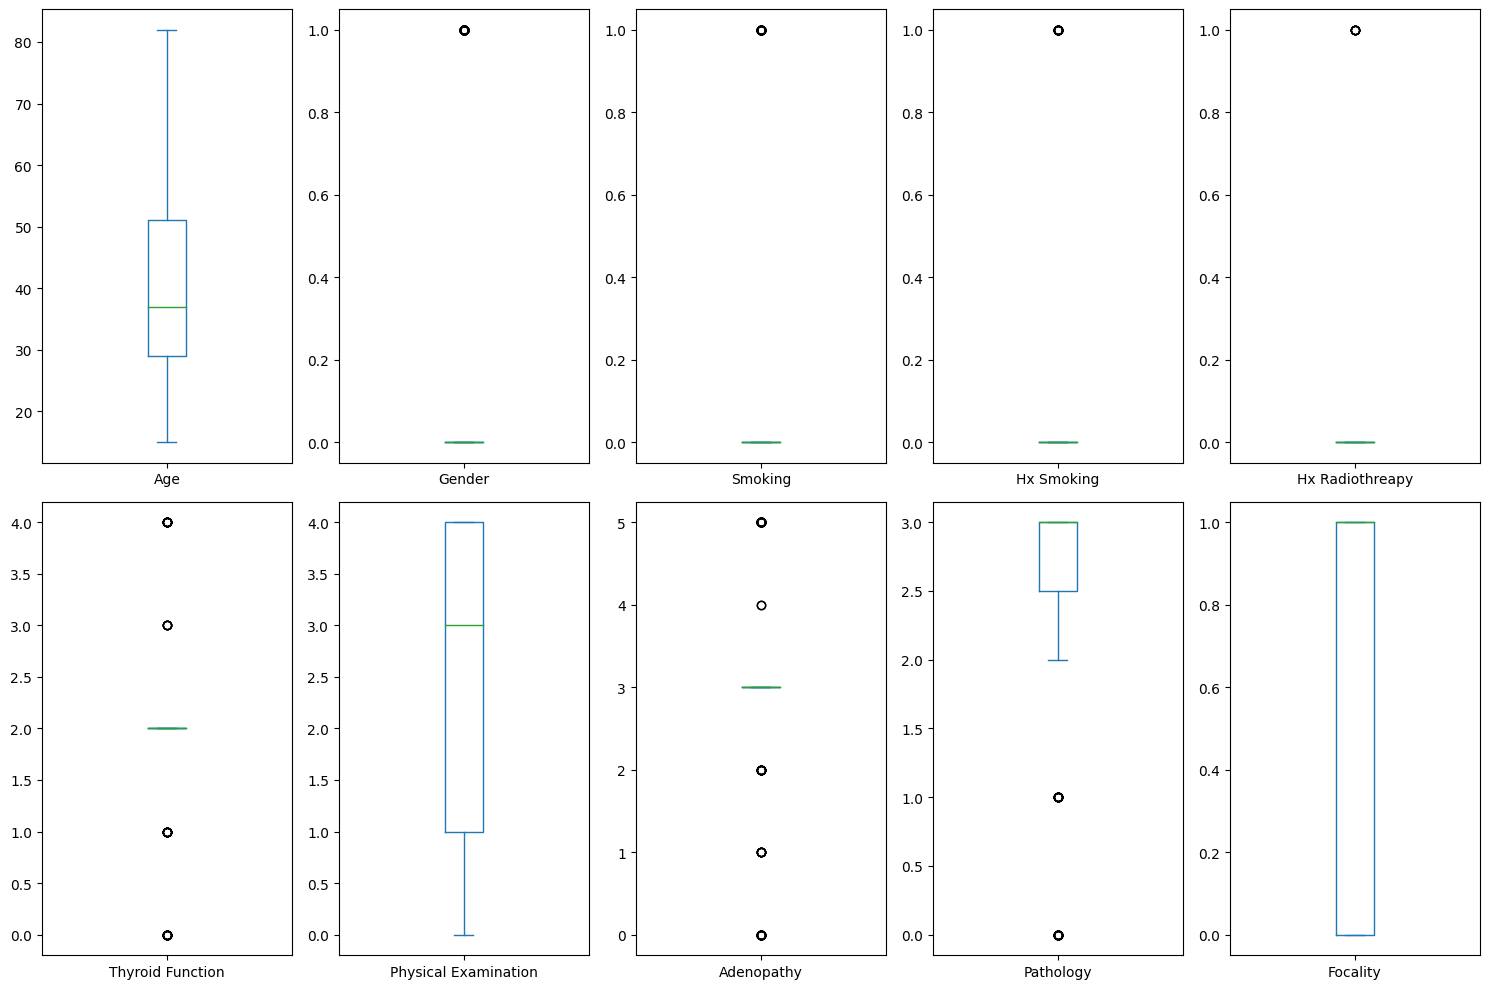

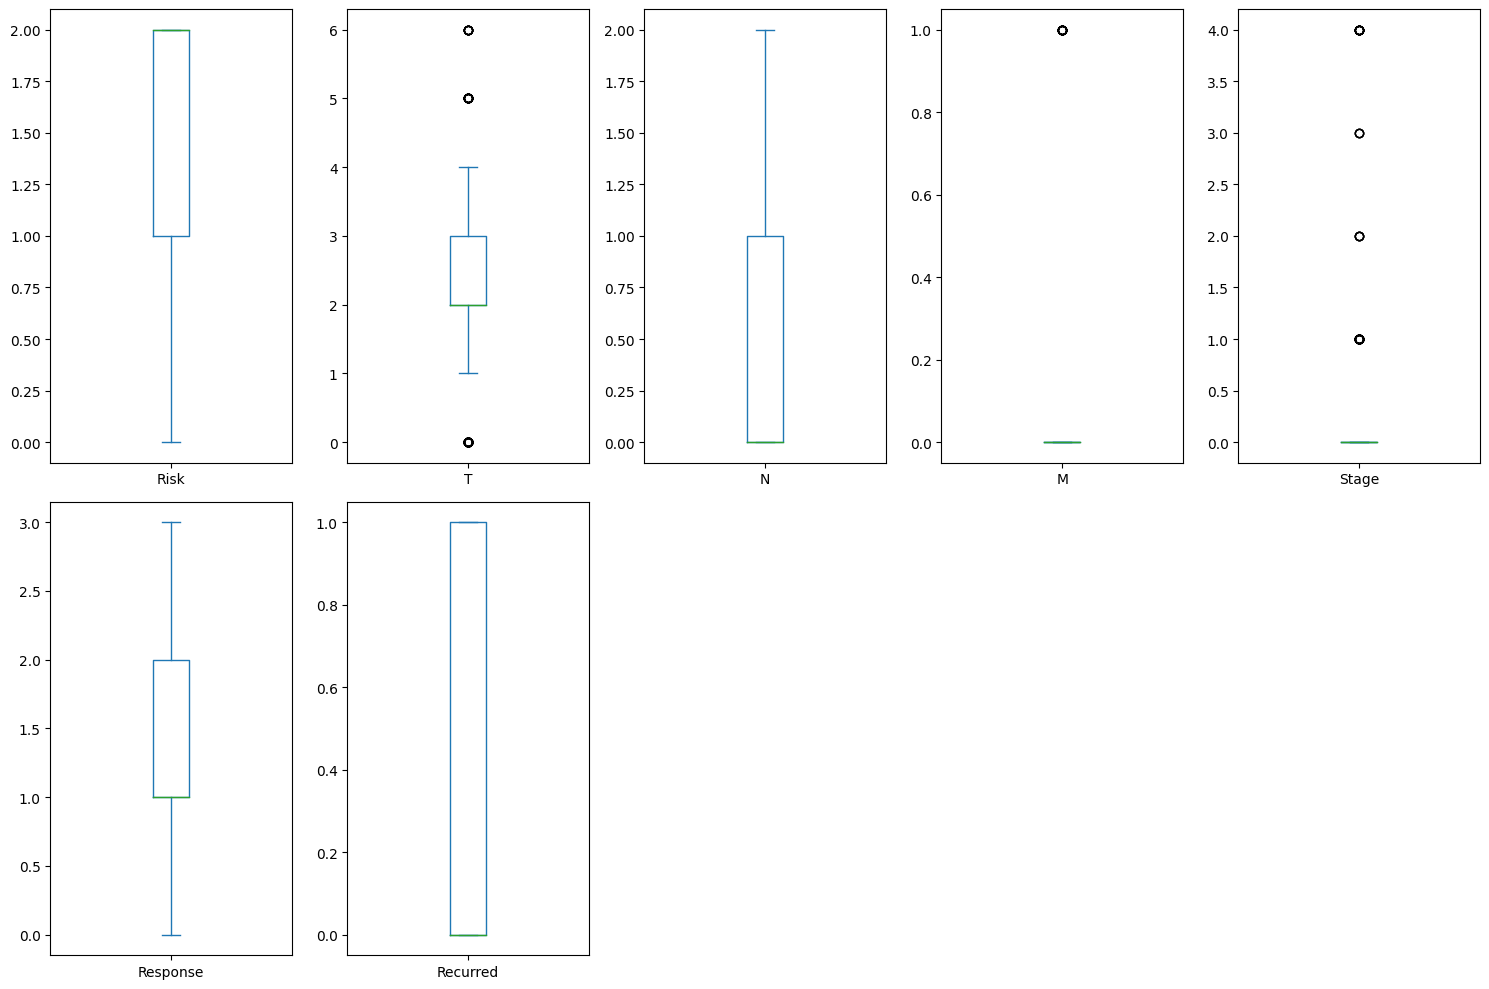

In [34]:
import matplotlib.pyplot as plt
num_columns = len(myData.columns)
cols_per_fig = 10

for i in range(0, num_columns, cols_per_fig):
    myData.iloc[:, i:i+cols_per_fig].plot(
        kind='box', 
        subplots=True, 
        layout=(2, 5),
        figsize=(15, 10),
        sharex=False,
        sharey=False
    )
    plt.tight_layout()
    plt.show()

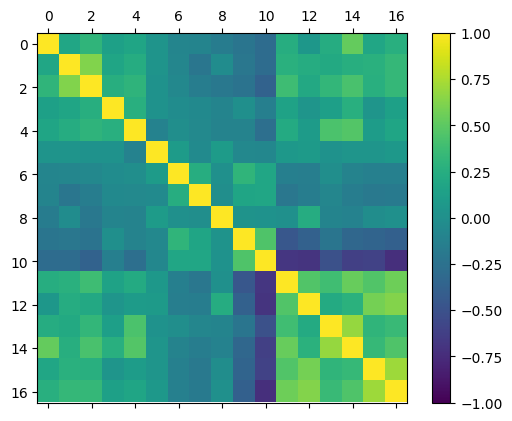

In [35]:
correlations = myData.corr()
# plot correlation matrix
myfig = plt.figure()
axis = myfig.add_subplot(111) # There is only one subplot or graph;
# "111" means "1x1 grid, first subplot"
cax = axis.matshow(correlations, vmin = -1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1)

In [14]:
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from numpy import set_printoptions
# 
# label_encoder = LabelEncoder()
# 
# categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
# 
# for col in categorical_columns:
#     myData[col] = label_encoder.fit_transform(myData[col])

In [36]:
X = myData.drop('Recurred', axis=1).values
Y = myData['Recurred'].values

mydataScaler = MinMaxScaler(feature_range=(0, 1))
mydataRescaled = mydataScaler.fit_transform(X)

set_printoptions(precision=3)
print(mydataRescaled[20:25, :])

[[0.388 0.    0.    0.    0.    0.5   0.75  0.6   0.667 1.    1.    0.
  0.    0.    0.    0.333]
 [0.433 0.    0.    0.    0.    0.5   0.75  0.6   0.667 1.    1.    0.
  0.    0.    0.    0.333]
 [0.313 0.    0.    0.    0.    0.5   1.    0.6   0.667 1.    1.    0.
  0.    0.    0.    0.333]
 [0.821 0.    0.    0.    0.    0.5   1.    0.6   0.667 1.    1.    0.
  0.    0.    0.    0.333]
 [0.672 0.    0.    0.    0.    0.5   0.25  0.6   0.667 0.    1.    0.
  0.    0.    0.    0.333]]


In [37]:
from sklearn.preprocessing import LabelEncoder, Normalizer

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

mydata_train = myData.drop('Recurred', axis=1).values
mydata_label = myData['Recurred'].values

mydataScaler = Normalizer().fit(mydata_train)
mydataNormalized = mydataScaler.transform(mydata_train)

set_printoptions(precision=3)
print(mydataNormalized[20:25, :])

[[0.991 0.    0.    0.    0.    0.048 0.072 0.072 0.048 0.024 0.048 0.
  0.    0.    0.    0.024]
 [0.992 0.    0.    0.    0.    0.045 0.068 0.068 0.045 0.023 0.045 0.
  0.    0.    0.    0.023]
 [0.985 0.    0.    0.    0.    0.055 0.109 0.082 0.055 0.027 0.055 0.
  0.    0.    0.    0.027]
 [0.996 0.    0.    0.    0.    0.028 0.057 0.043 0.028 0.014 0.028 0.
  0.    0.    0.    0.014]
 [0.997 0.    0.    0.    0.    0.033 0.017 0.05  0.033 0.    0.033 0.
  0.    0.    0.    0.017]]


In [38]:
from sklearn.preprocessing import Binarizer

mydataBinarizer = Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized = mydataBinarizer.transform(mydata_train)
set_printoptions(precision = 3)
print(mydatabinarized[0:5,:])

[[1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1]
 [1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1]
 [1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1]
 [1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1]
 [1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1]]


In [39]:
from sklearn.feature_selection import SelectKBest, f_regression

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

min_value = myData.drop('Recurred', axis=1).min().min()
if min_value < 0:
    myData += abs(min_value)

mydata_train = myData.drop('Recurred', axis=1).values
mydata_label = myData['Recurred'].values

myFeature = SelectKBest(score_func=f_regression, k=4)
fit = myFeature.fit(mydata_train, mydata_label)

set_printoptions(precision=3)
print(fit.scores_)

[2.737e+01 4.599e+01 4.760e+01 7.188e+00 1.195e+01 1.757e+00 6.736e+00
 1.313e+01 4.078e-03 6.581e+01 4.434e+02 1.707e+02 2.538e+02 5.471e+01
 9.628e+01 3.850e+02]


In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
mydataRFE = RFE(model, n_features_to_select=4)
mydataFit = mydataRFE.fit(mydata_train, mydata_label)

print("Number of features selected: %d" % mydataFit.n_features_)
print("Selected features are denoted by True: %s" % mydataFit.support_)
print("Feature Ranking: %s" % mydataFit.ranking_)

Number of features selected: 4
Selected features are denoted by True: [False  True False  True False False False False False False  True False
 False False False  True]
Feature Ranking: [10  1  9  1  3 12  7 13  8  6  1  4  2  5 11  1]


In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
fit = pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.962 0.013 0.007]
[[ 0.999  0.005  0.007  0.002  0.002  0.002 -0.008 -0.008 -0.009 -0.007
  -0.013  0.022  0.004  0.003  0.027  0.011]
 [-0.035  0.072  0.064  0.017  0.015  0.019 -0.364 -0.309  0.053 -0.146
  -0.278  0.625  0.335  0.044  0.2    0.339]
 [-0.006  0.018  0.033  0.01   0.012  0.071  0.83   0.306  0.028  0.008
  -0.13   0.359  0.152  0.038  0.123  0.156]]


In [42]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(383, 1)


In [43]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(383, 3)


In [44]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

myData['Recurred'] = pd.cut(myData['Recurred'], bins=3, labels=[0, 1, 2])
mydata_label = myData['Recurred'].values

model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

[0.042 0.02  0.02  0.006 0.001 0.02  0.023 0.044 0.012 0.028 0.196 0.071
 0.145 0.019 0.038 0.316]


Dataset Shape: (383, 17)

Columns: ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

Missing Values:
Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

Data Types:
Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object


KeyError: 'auc'

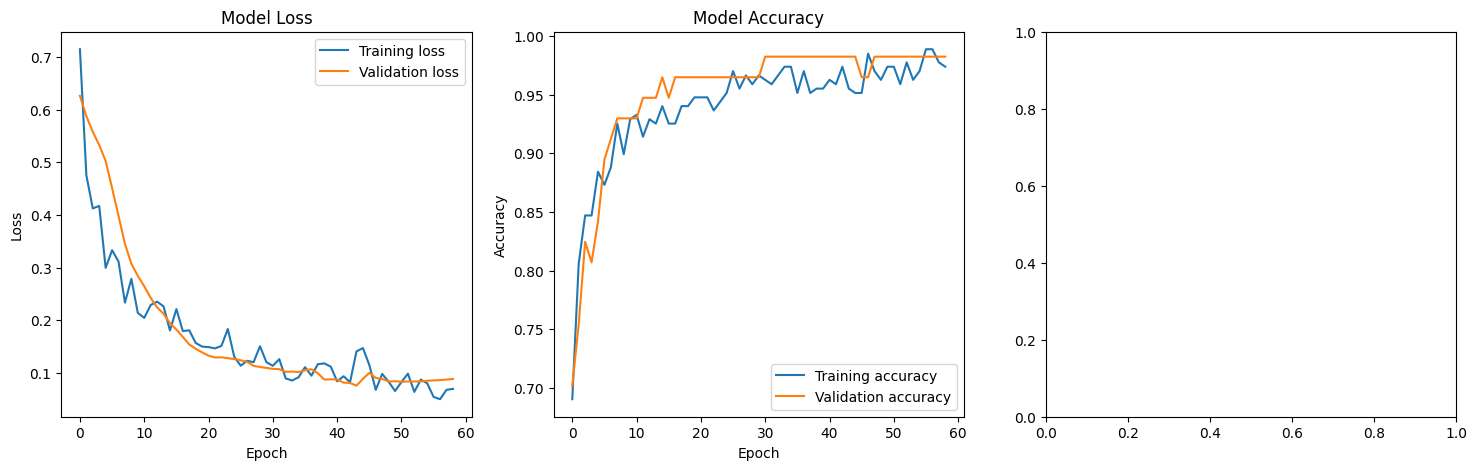

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_explore_data(filepath):
    try:
        data = pd.read_csv(filepath)
        
        print("Dataset Shape:", data.shape)
        print("\nColumns:", data.columns.tolist())
        print("\nMissing Values:")
        print(data.isnull().sum())
        print("\nData Types:")
        print(data.dtypes)
        
        print("\nFirst few rows:")
        print(data.head())
        
        return data
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return None

def preprocess_data(data):
    categorical_columns = data.select_dtypes(include=['object']).columns
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    
    print("\nCategorical columns:", categorical_columns.tolist())
    print("Numerical columns:", numerical_columns.tolist())
    
    label_encoders = {}
    encoded_data = data.copy()
    
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        encoded_data[column] = label_encoders[column].fit_transform(data[column].astype(str))
    
    scaler = StandardScaler()
    encoded_data[numerical_columns] = scaler.fit_transform(encoded_data[numerical_columns])
    
    return encoded_data, label_encoders, scaler

def create_model(input_dim):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.1),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(), 
                tf.keras.metrics.Precision(), 
                tf.keras.metrics.Recall()]
    )
    
    return model

def train_model(X_train, y_train, X_val, y_val, model, epochs=100, batch_size=32):
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.00001
    )
    
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )
    
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        'best_model.h5',
        monitor='val_loss',
        save_best_only=True
    )
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, reduce_lr, checkpoint],
        verbose=1
    )
    
    return history

def evaluate_model(model, X_test, y_test):
    results = model.evaluate(X_test, y_test, verbose=0)
    print("\nModel Performance:")
    print(f"Test Loss: {results[0]:.4f}")
    print(f"Test Accuracy: {results[1]:.4f}")
    print(f"Test AUC: {results[2]:.4f}")
    print(f"Test Precision: {results[3]:.4f}")
    print(f"Test Recall: {results[4]:.4f}")
    
    y_pred = model.predict(X_test)
    return y_pred

def plot_training_history(history):
    metrics = ['loss', 'accuracy', 'auc']
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for idx, metric in enumerate(metrics):
        axes[idx].plot(history.history[metric], label=f'Training {metric}')
        axes[idx].plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
        axes[idx].set_title(f'Model {metric.capitalize()}')
        axes[idx].set_xlabel('Epoch')
        axes[idx].set_ylabel(metric.capitalize())
        axes[idx].legend()
    
    plt.tight_layout()
    plt.show()

def main():
    data = load_and_explore_data('../data/Thyroid_Diff.csv')
    if data is None:
        return
    
    encoded_data, label_encoders, scaler = preprocess_data(data)
    
    X = encoded_data.drop(['Recurred'], axis=1)
    y = encoded_data['Recurred']
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    print("\nData split sizes:")
    print(f"Training set: {X_train.shape}")
    print(f"Validation set: {X_val.shape}")
    print(f"Test set: {X_test.shape}")
    
    model = create_model(X_train.shape[1])
    print("\nModel Summary:")
    model.summary()
    
    history = train_model(X_train, y_train, X_val, y_val, model)
    
    y_pred = evaluate_model(model, X_test, y_test)
    
    plot_training_history(history)
    
    return model, label_encoders, scaler, history

if __name__ == "__main__":
    model, label_encoders, scaler, history = main()